In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>


# Исследование нормального распределения


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


train k = 11, iterations = 41


train k = 12, iterations = 53


train k = 13, iterations = 73


train k = 14, iterations = 89


train k = 15, iterations = 52


/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


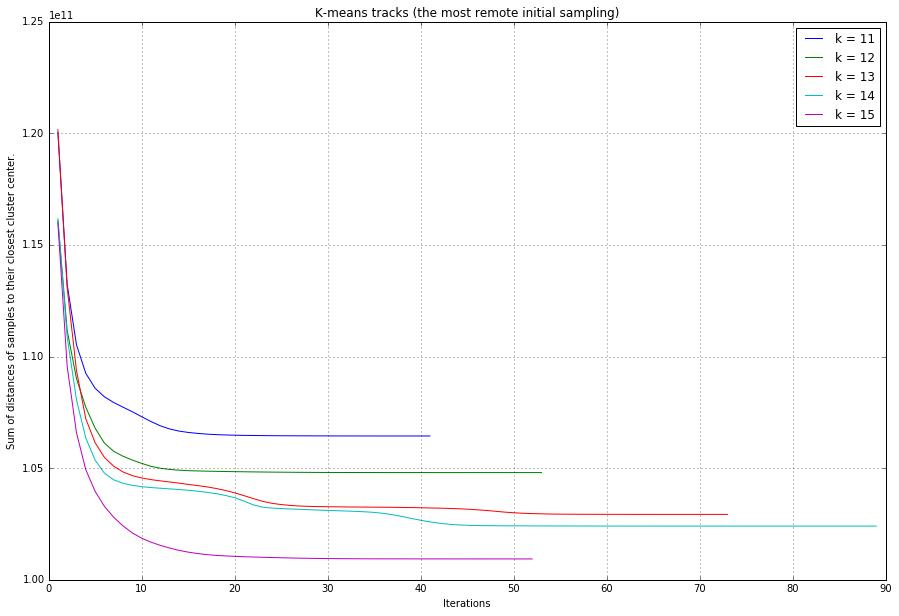

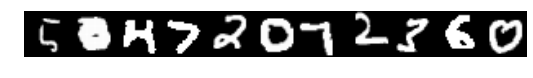

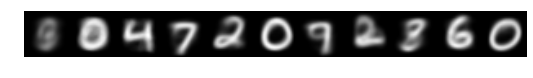

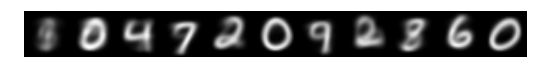

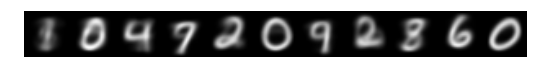

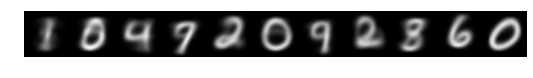

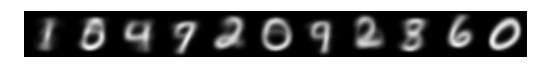

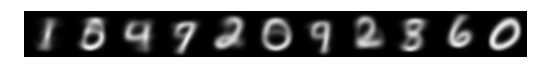

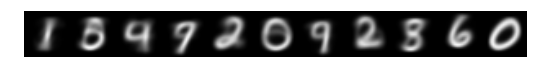

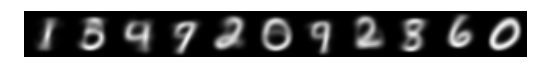

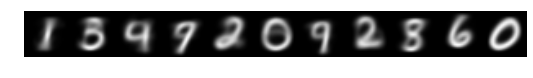

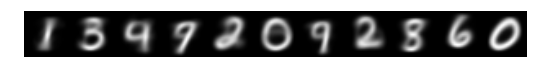

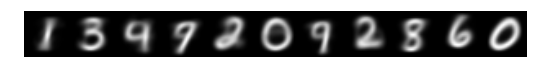

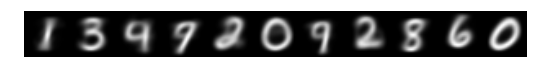

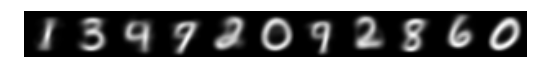

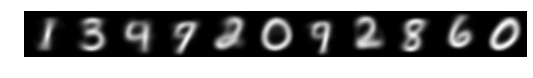

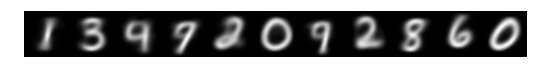

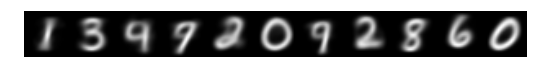

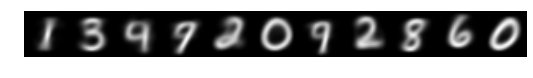

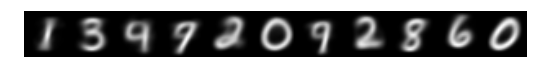

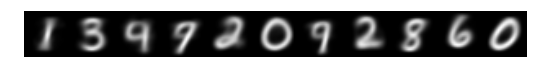

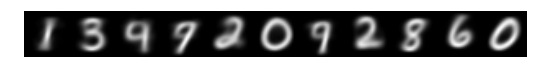

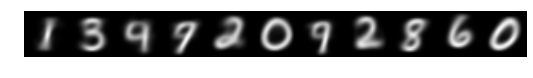

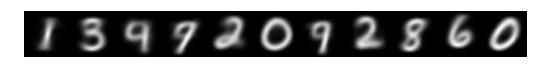

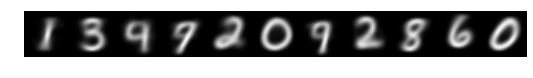

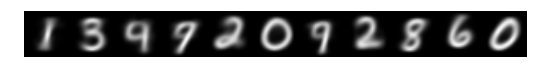

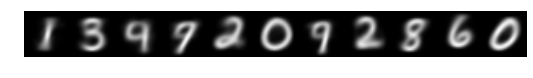

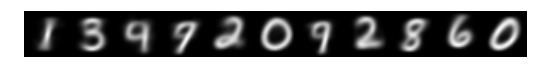

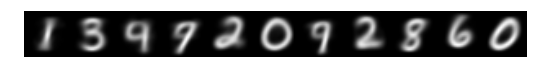

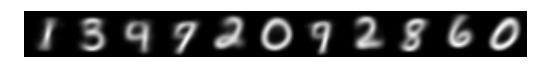

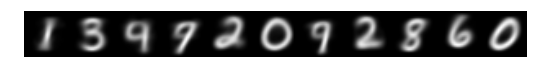

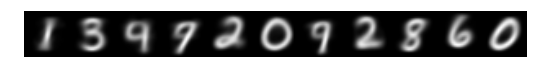

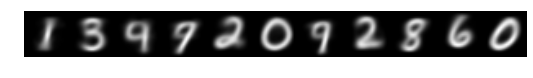

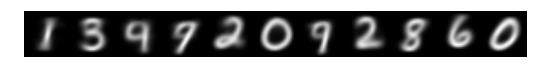

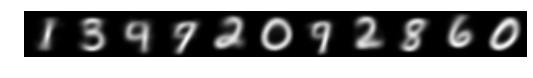

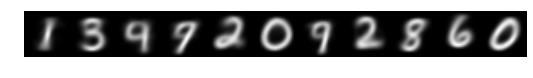

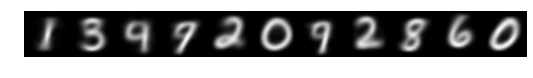

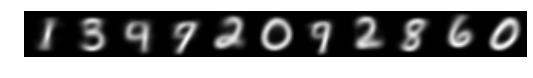

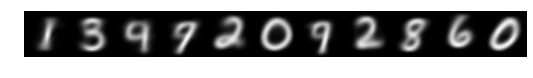

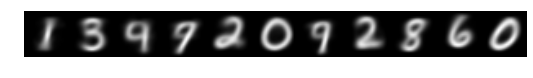

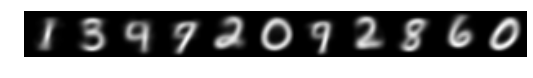

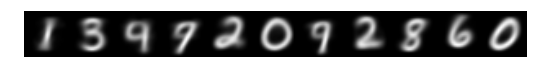

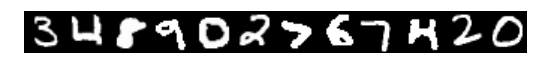

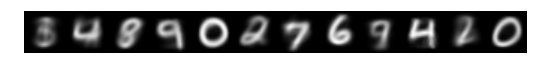

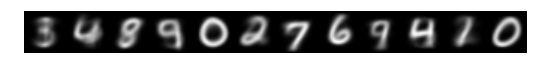

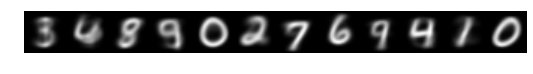

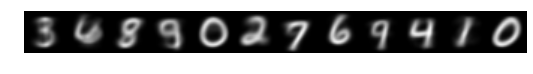

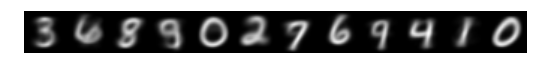

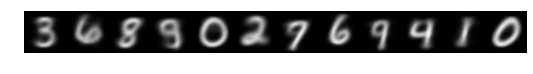

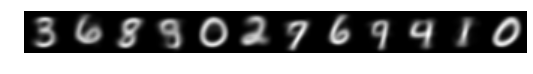

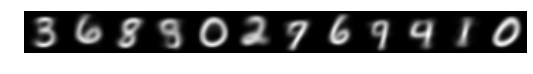

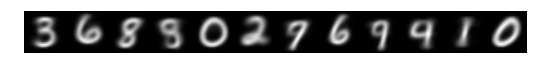

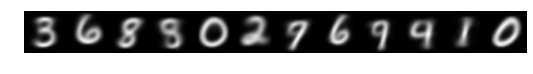

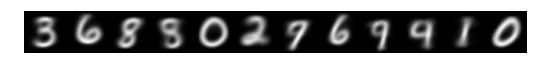

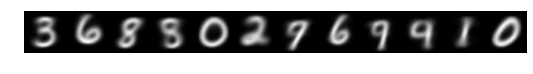

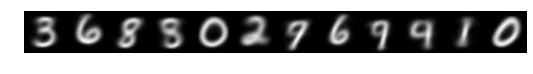

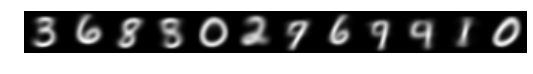

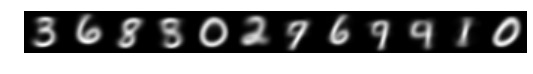

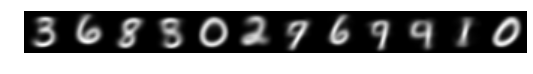

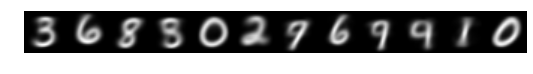

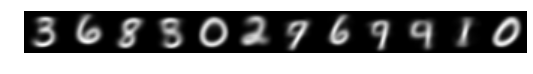

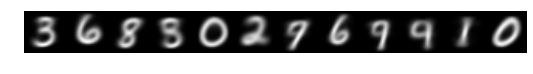

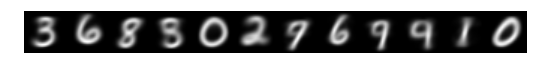

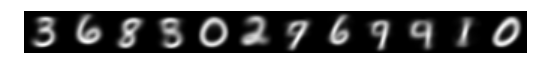

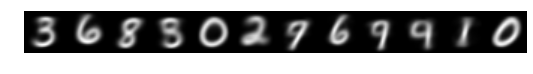

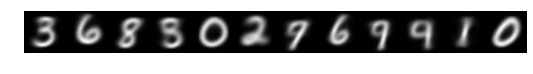

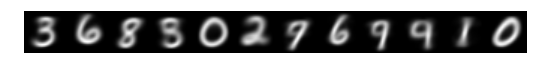

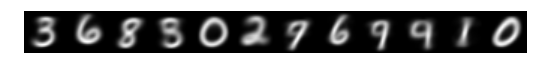

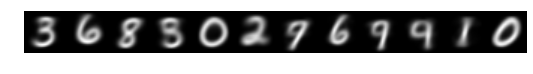

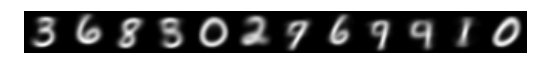

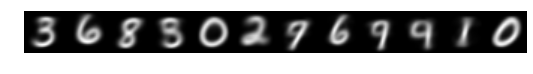

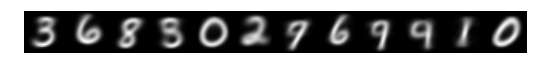

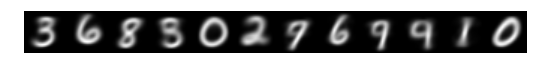

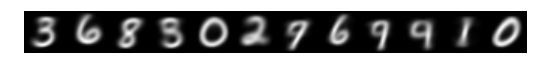

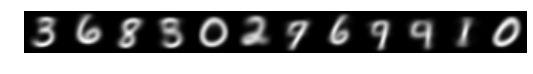

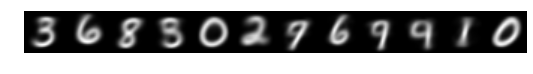

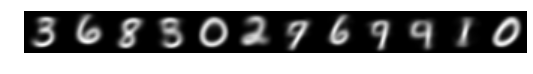

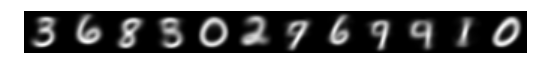

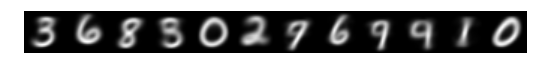

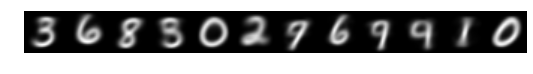

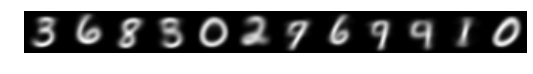

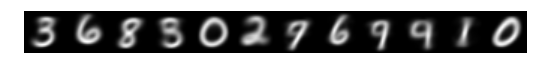

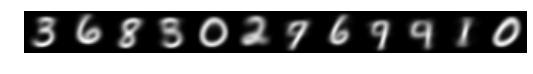

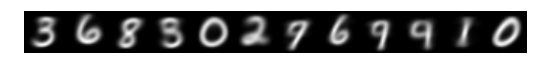

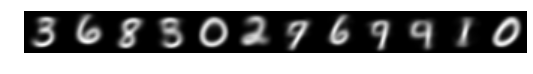

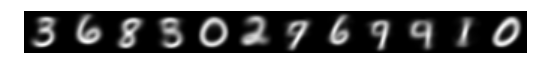

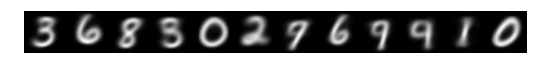

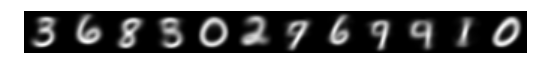

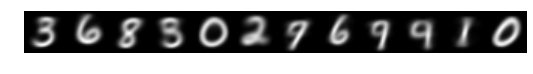

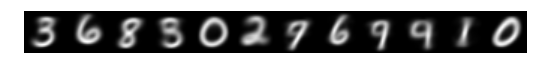

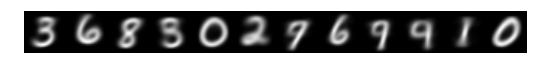

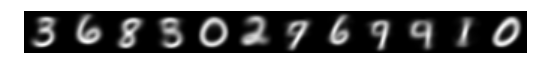

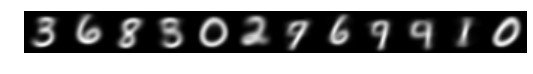

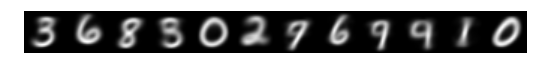

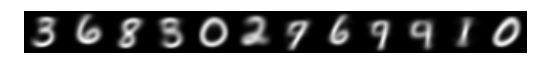

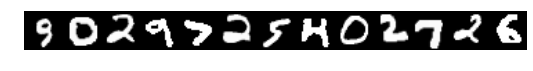

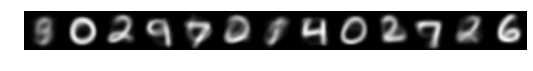

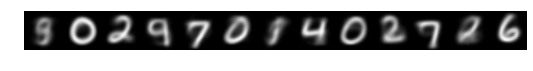

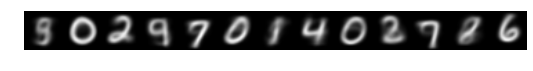

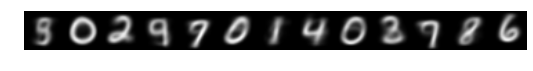

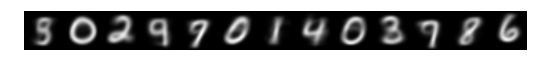

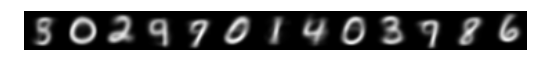

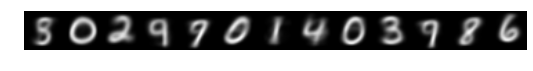

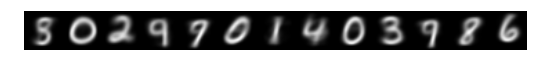

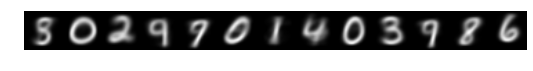

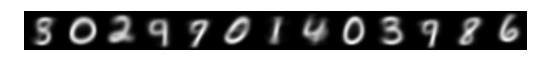

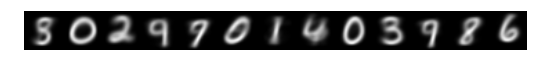

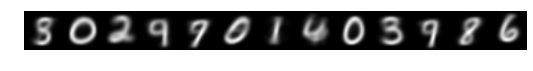

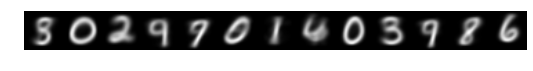

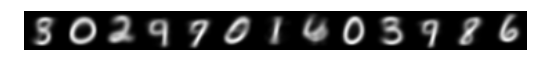

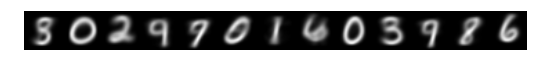

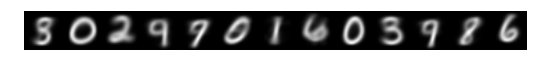

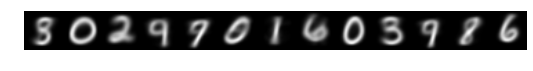

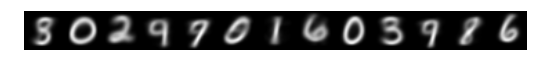

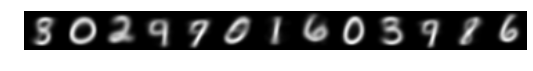

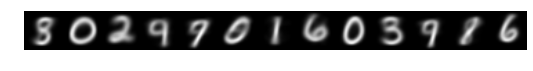

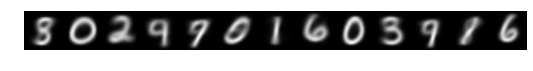

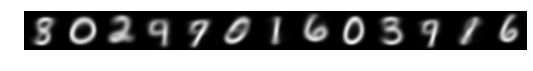

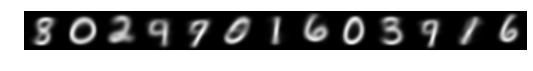

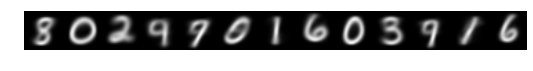

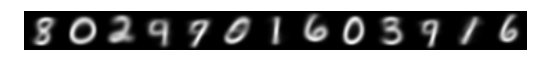

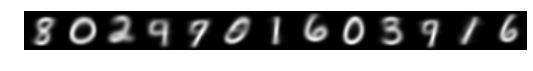

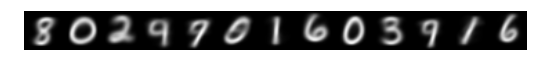

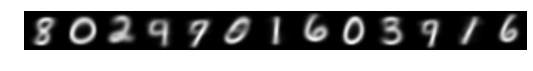

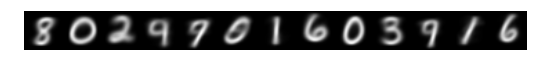

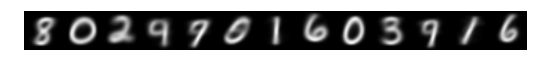

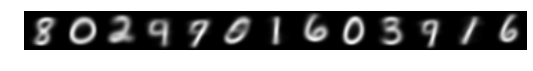

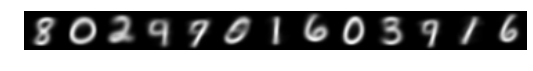

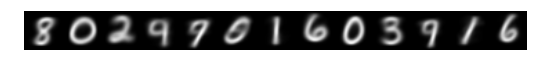

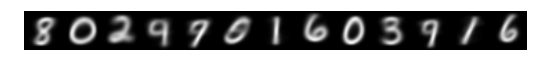

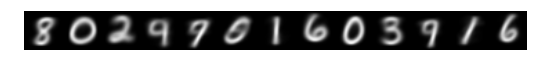

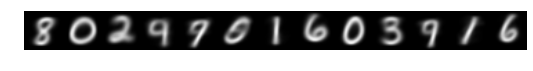

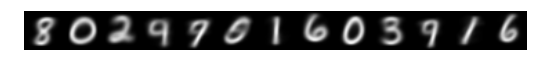

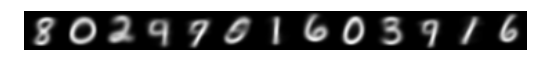

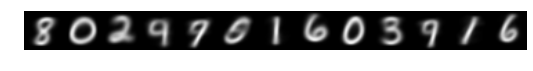

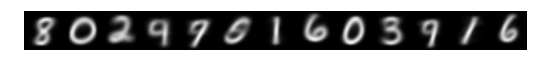

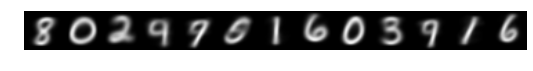

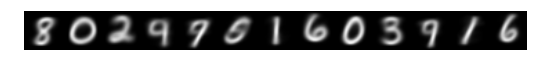

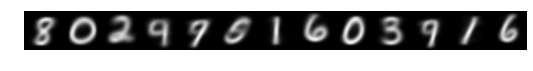

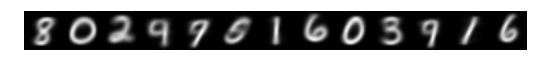

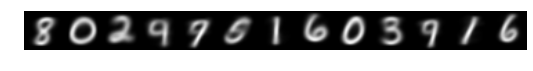

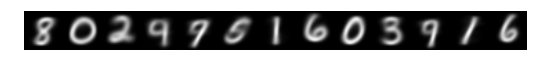

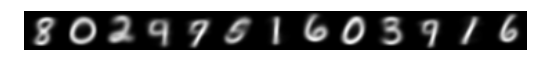

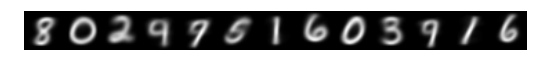

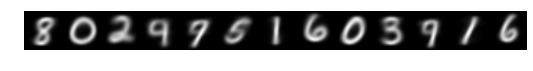

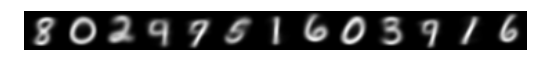

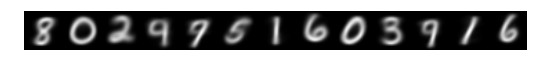

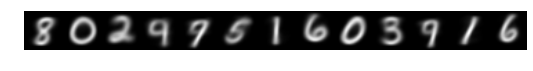

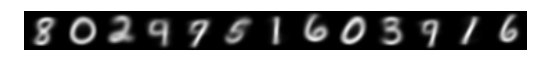

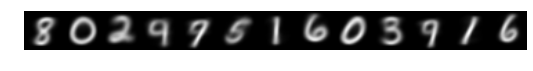

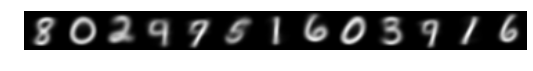

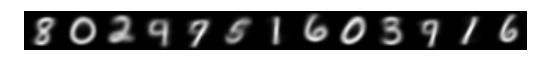

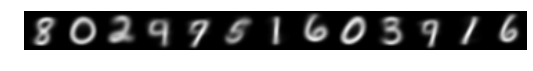

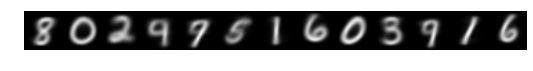

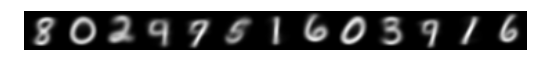

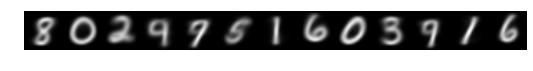

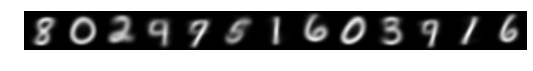

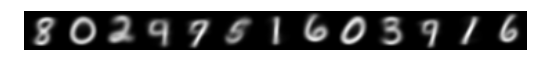

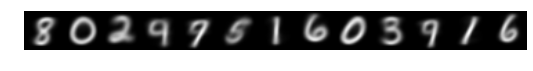

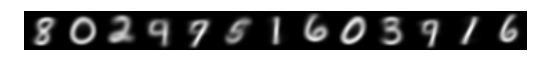

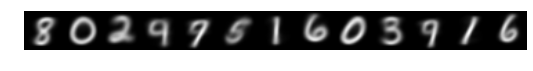

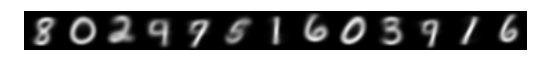

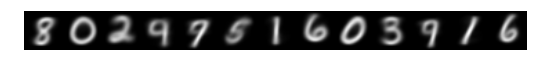

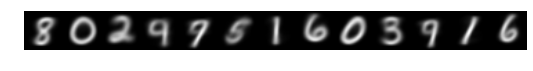

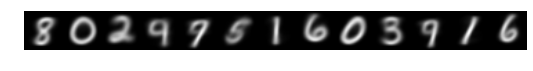

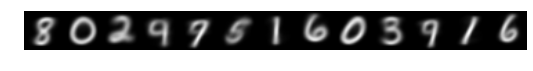

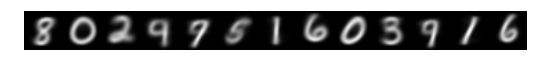

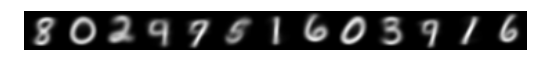

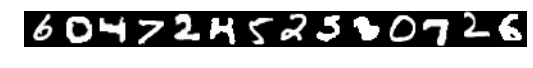

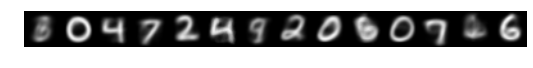

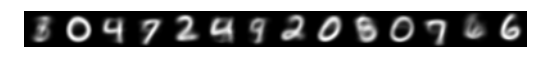

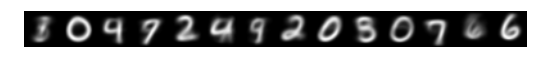

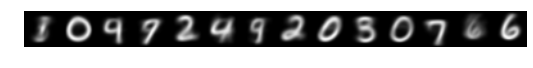

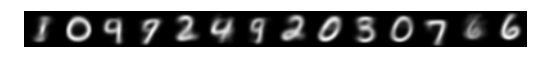

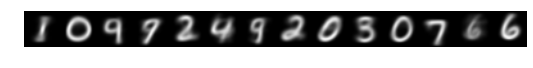

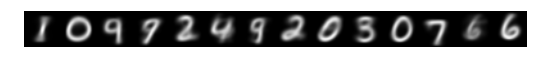

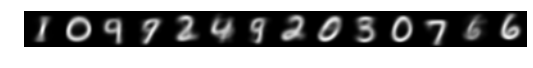

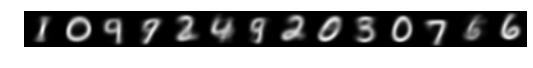

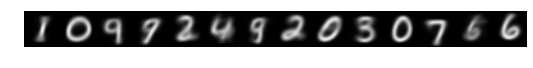

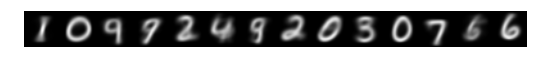

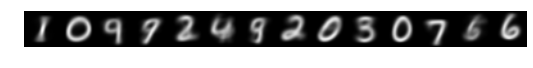

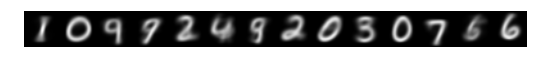

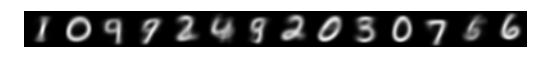

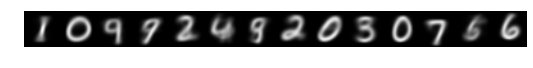

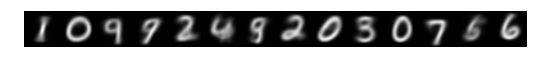

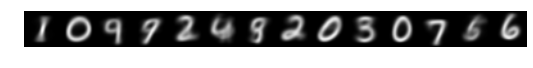

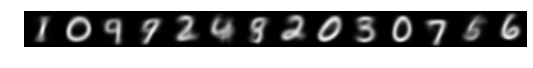

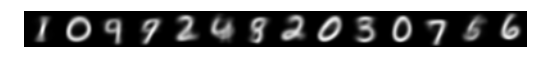

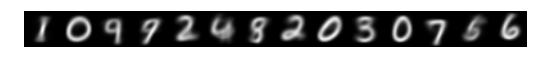

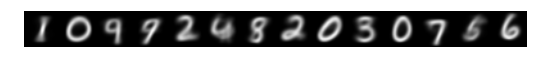

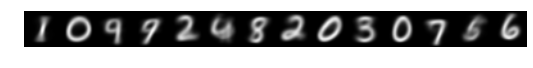

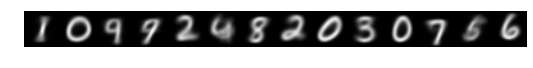

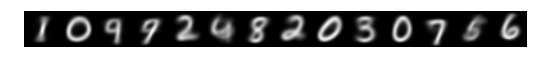

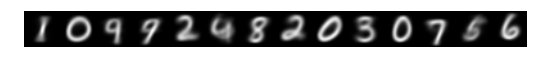

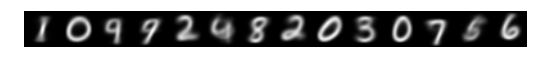

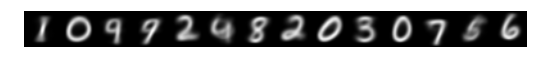

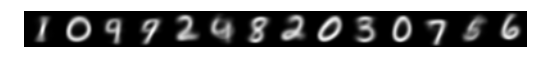

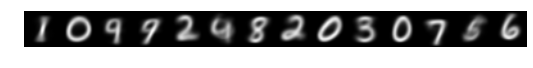

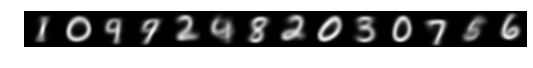

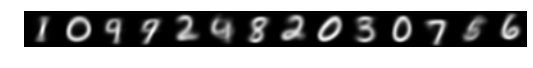

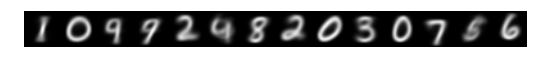

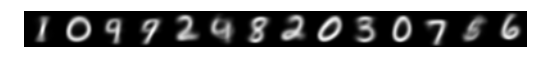

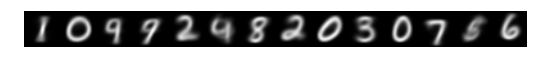

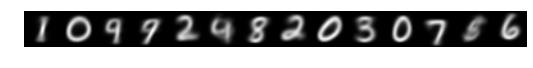

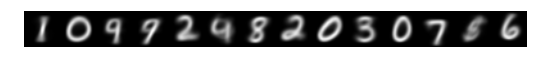

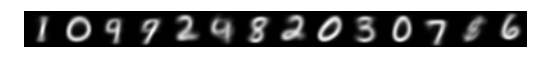

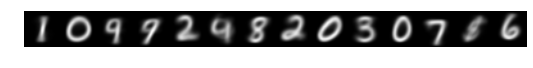

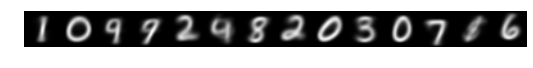

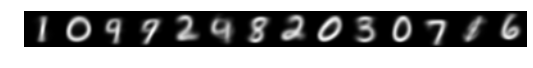

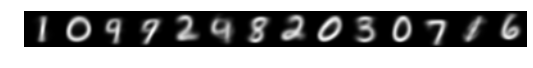

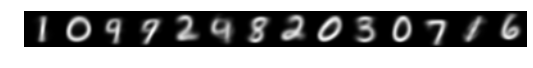

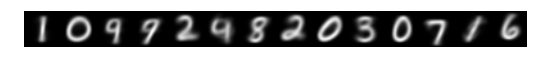

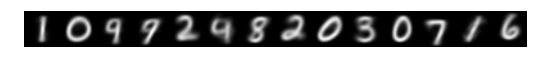

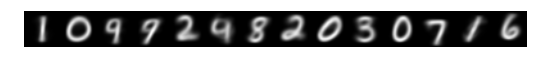

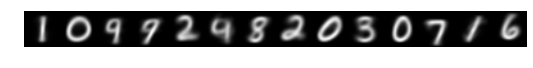

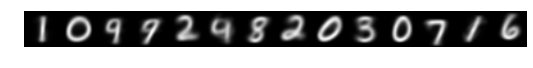

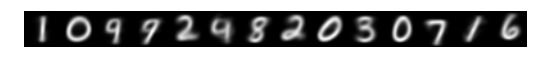

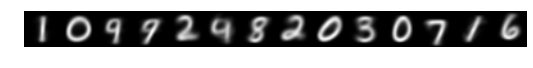

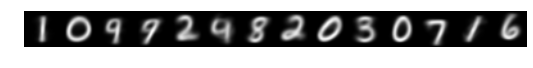

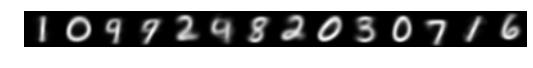

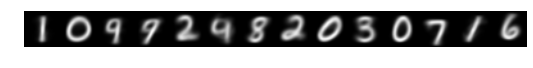

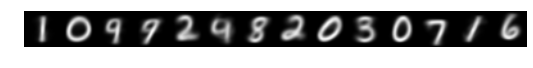

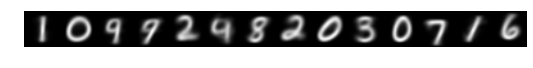

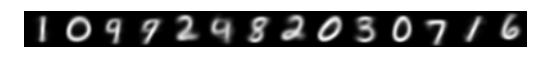

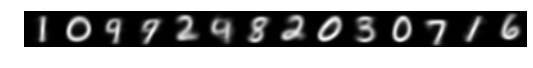

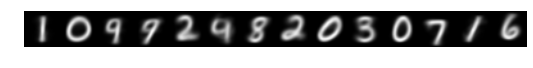

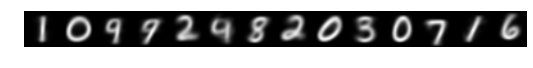

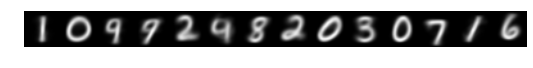

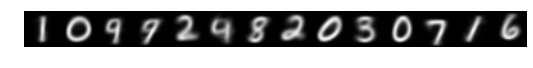

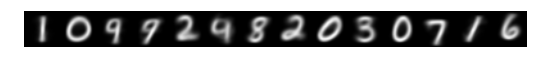

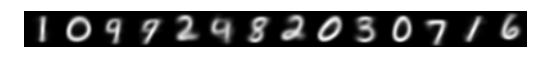

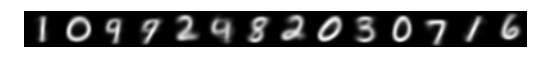

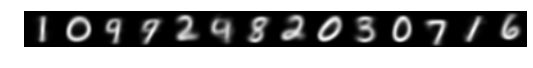

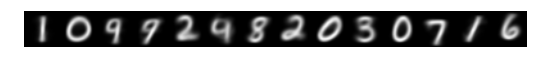

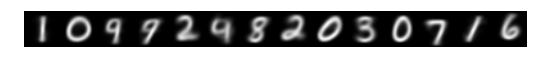

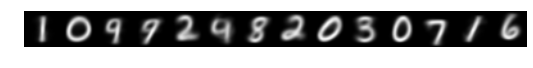

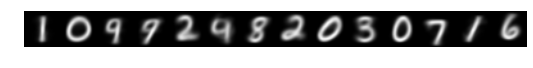

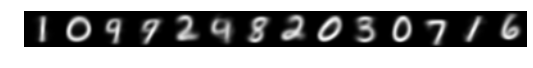

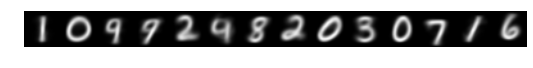

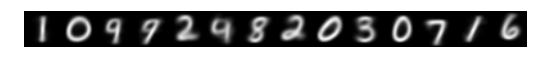

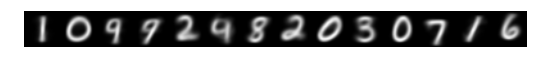

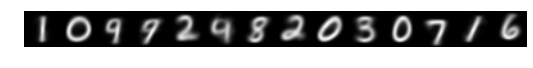

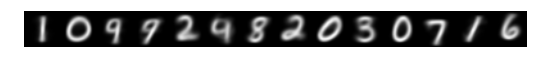

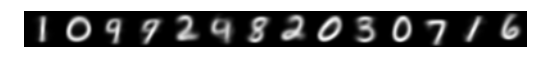

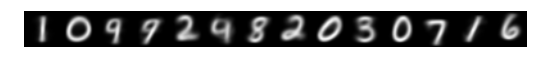

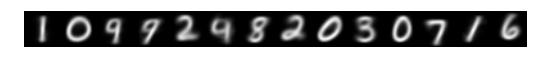

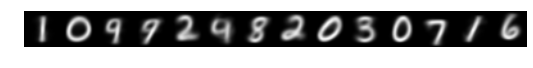

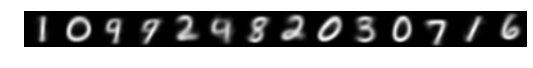

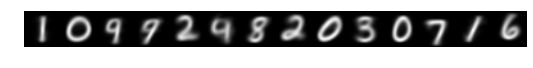

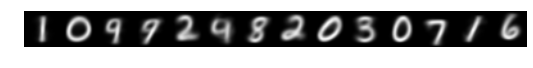

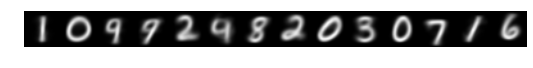

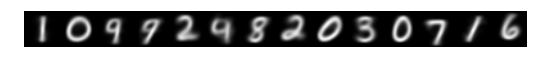

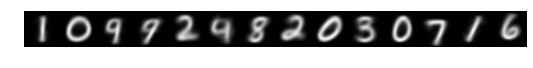

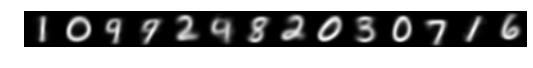

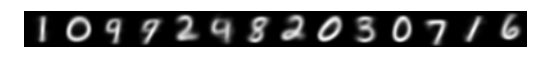

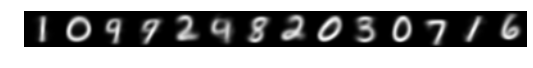

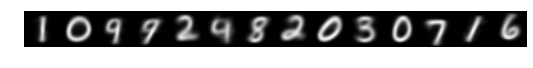

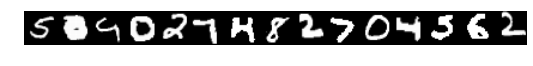

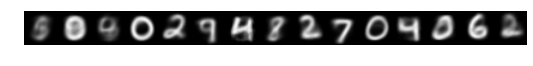

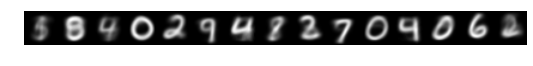

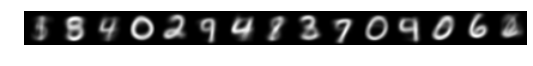

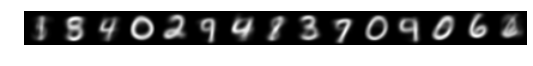

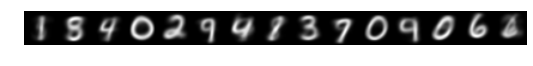

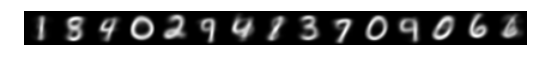

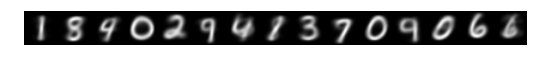

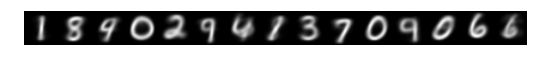

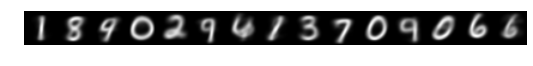

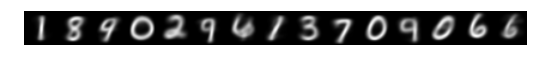

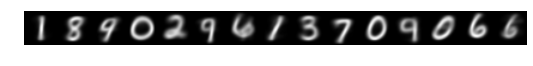

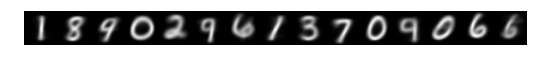

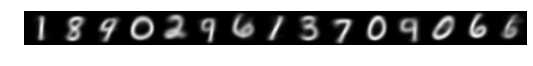

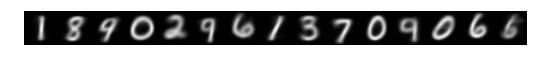

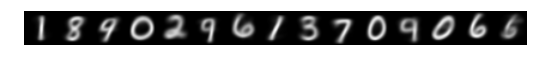

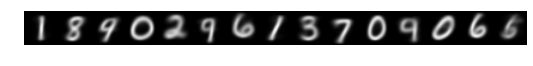

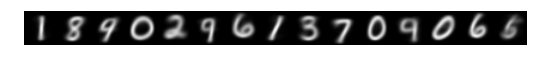

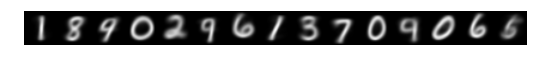

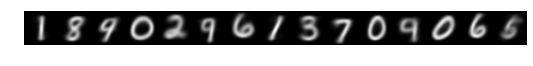

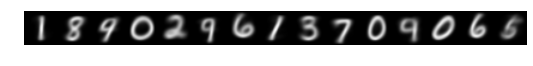

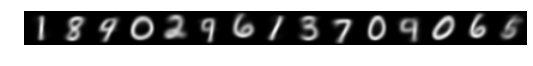

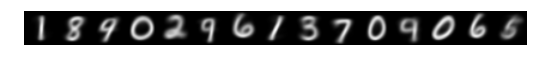

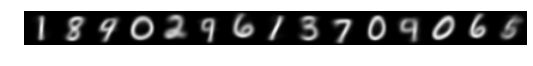

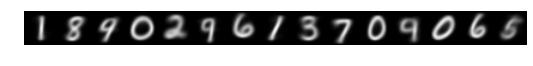

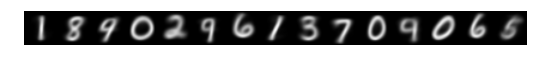

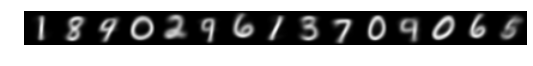

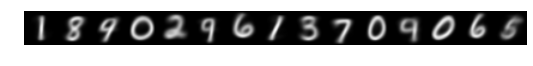

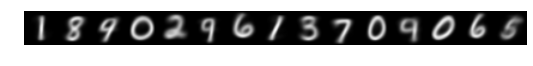

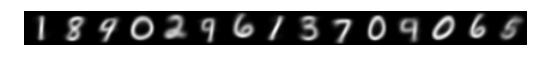

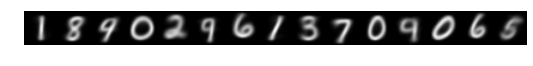

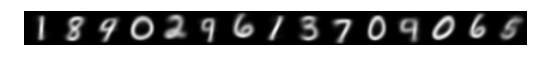

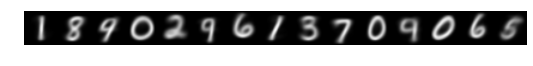

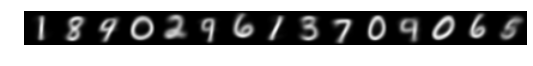

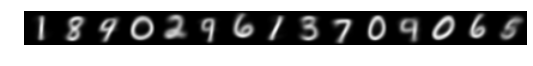

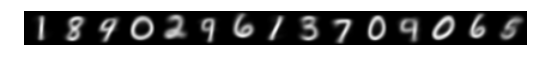

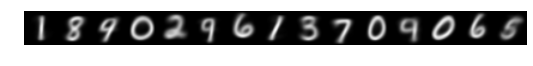

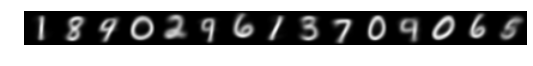

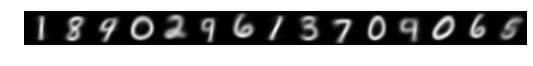

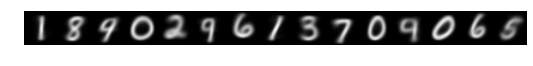

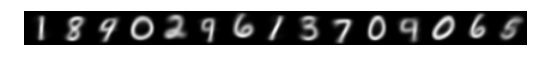

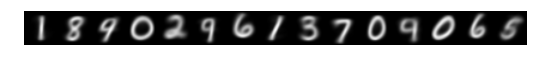

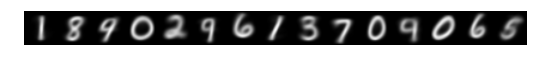

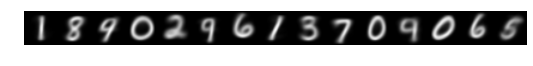

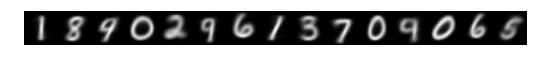

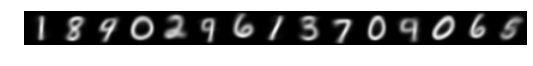

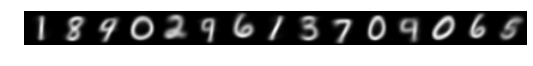

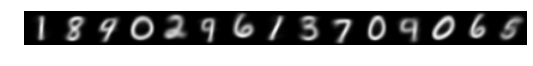

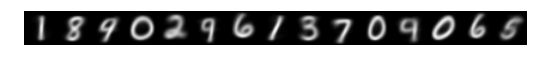

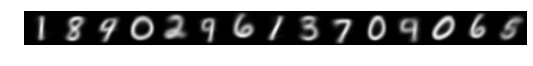

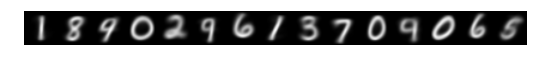

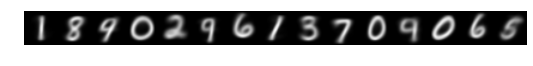

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from my_lib import *

IMG_X_SIZE, IMG_Y_SIZE = 15, 10

train_sample = pandas.read_csv("train.csv")
test_sample = pandas.read_csv("test.csv")
# result_file = open("result.csv", "w")

x_array = train_sample[train_sample.columns[1:]].values
y = train_sample[train_sample.columns[0]].values

d = {}

# begin, end = 15, 16
# begin, end = 2,3
# begin, end = 1, 6
# begin, end = 6, 11
begin, end = 11, 16
for k in range(begin, end):
    # init_centers = get_random_centers(x_array, k)
    init_centers = get_k_away_centers(x_array, k)
    args, values, centers_list = train_k_means(k, init_centers, x_array, 1.0)
    d.update({k: (args, values, centers_list)})
    print "train k = %s, iterations = %s" % (k, len(args))

# draw first 1-5 functions
fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
plt.title("K-means tracks (the most remote initial sampling)")
# plt.title("K-means tracks (random initial sampling)")
for k in range(begin, end):
    args, values, centers_list = d[k]
    plt.plot(args, values, label="k = %s" % k)
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Sum of distances of samples to their closest cluster center.")
    plt.grid(True)
plt.savefig("data/1/functions_k=%s-%s.png" % (begin, end-1), cmap="gray")


for k in range(begin, end):
    args, values, centers_list = d[k]
    for i in range(len(args)):
        fig = plt.figure(figsize=(0.6 * 15, 1))
        # plt.title("k = %s, iteration = %s" % (k, i))
        plt.axis("off")
        iter_i = [centers_list[i][j].reshape((28, 28)) for j in range(k)]
        picture = np.column_stack(iter_i)
        plt.imshow(picture, cmap="gray")
        plt.savefig("data/1/digits_k=%s_it=%s.png" % (k, i), cmap="gray")

# k, i = 15, 0
# fig = plt.figure(figsize=(0.6 * 15, 1))
# # plt.title("k = %s, iteration = %s" % (k, i))
# plt.axis("off")
# iter_i = [centers_list[0][0].reshape((28, 28)) for j in range(k)]
# picture = np.column_stack(iter_i)
# plt.imshow(picture, cmap="gray")
# plt.savefig("data/digits_k=%s_it=%s.png" % (k, i), cmap="gray")

{'boxes': [<matplotlib.lines.Line2D at 0x7f9fcd45eb10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9fcd469a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9fcd446d10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9fcd4466d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9fcd45ecd0>,
  <matplotlib.lines.Line2D at 0x7f9fcd3e5c90>]}

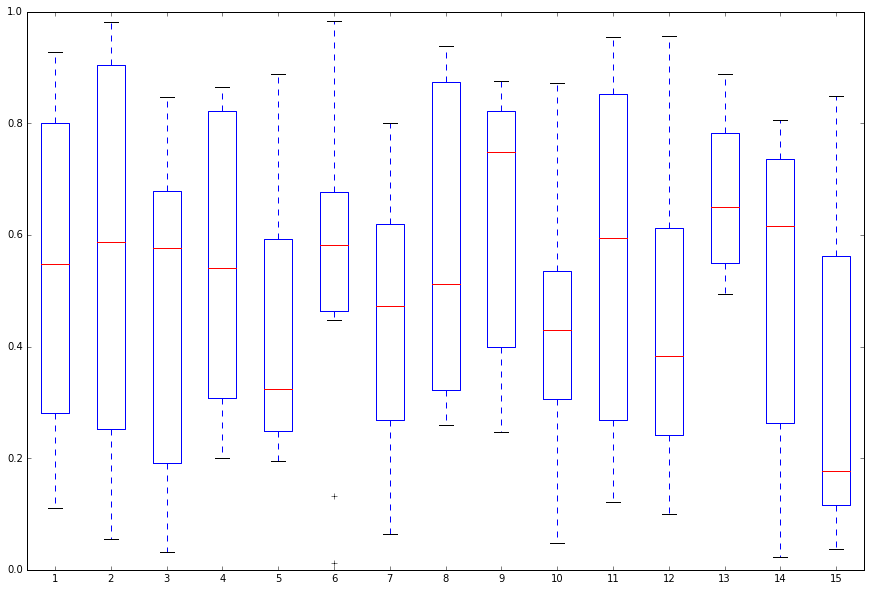

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from my_lib import *

IMG_X_SIZE, IMG_Y_SIZE = 15, 10
# print "hello"
train_sample = pandas.read_csv("train.csv")
test_sample = pandas.read_csv("test.csv")
# result_file = open("result.csv", "w")

x_array = train_sample[train_sample.columns[1:]].values
y = train_sample[train_sample.columns[0]].values

d = {}
data = np.random.rand(100)
fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
a= plt.boxplot([np.random.rand(10) for i in range(15)])
# 
# begin, end = 1, 6
# for k in range(begin, end):
#     # init_centers = get_random_centers(x_array, k)
#     init_centers = get_k_away_centers(x_array, k)
#     args, values, centers_list = train_k_means(k, init_centers, x_array, 1.0)
#     d.update({k: (args, values, centers_list)})
#     print "train k = %s, iterations = %s" % (k, len(args))
# 
# # draw first 1-5 functions
# fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
# plt.title("K-means tracks (the most remote initial sampling)")
# # plt.title("K-means tracks (random initial sampling)")
# for k in range(begin, end):
#     args, values, centers_list = d[k]
#     plt.plot(args, values, label="k = %s" % k)
#     plt.legend()
#     plt.xlabel("Iterations")
#     plt.ylabel("Sum of distances of samples to their closest cluster center.")
#     plt.grid(True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from norm_lib import NormDistribution 

X_MIN, X_MAX = -30, 30
Y_MIN, Y_MAX = float(.0), float(.45)
X_FUNC_STEP = .1
X_FUNC = np.arange(X_MIN, X_MAX, X_FUNC_STEP)
IMG_X_SIZE, IMG_Y_SIZE = 15, 10
X_GRID_STEP = (X_MAX - X_MIN) / float(IMG_X_SIZE)
Y_GRID_STEP = (Y_MAX - Y_MIN) / float(IMG_Y_SIZE)
Y_GRID = np.arange(Y_MIN - Y_GRID_STEP, Y_MAX * 1.5 + Y_GRID_STEP, Y_GRID_STEP)
X_GRID = np.arange(X_MIN, X_MAX, X_GRID_STEP)


# print "integral = %s" % quad(lambda x: x ** 2, -5., 5.)
fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
plt.title("Probability density function (PDF) for Normal distribution")
# for median, dispersion in [(0, 1)]:
for median, dispersion in [(0, 1), (5, 1), (0, 25)]:
    norm_distribution = NormDistribution(median, dispersion, None)
    sample = norm_distribution.gen_sample()
    kernel_pdf = norm_distribution.gauss_kernel(sample)
    pdf_array = kernel_pdf(X_FUNC)
    # print f(X_FUNC)
    # print sample_size_dict
    plt.plot(X_FUNC, pdf_array, label="kernel pdf of " + str(norm_distribution))
    plt.plot(X_FUNC, norm_distribution.pdf(X_FUNC), label="pdf of " + str(norm_distribution))
    plt.xticks(X_GRID)
    plt.yticks(Y_GRID)
    plt.legend()

    plt.xlabel("X")
    plt.ylabel("Y")

    plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from norm_lib import NormDistribution, integral

X_MIN, X_MAX = float(-15), float(15)
Y_MIN, Y_MAX = float(.0), float(1.)

X_FUNC_STEP = .1
X_FUNC = np.arange(X_MIN, X_MAX, X_FUNC_STEP)
IMG_X_SIZE, IMG_Y_SIZE = 15, 10
X_GRID_STEP = (X_MAX - X_MIN) / float(IMG_X_SIZE)
Y_GRID_STEP = (Y_MAX - Y_MIN) / float(IMG_Y_SIZE)
Y_GRID = np.arange(Y_MIN - Y_GRID_STEP, Y_MAX * 1.5 + Y_GRID_STEP, Y_GRID_STEP)
X_GRID = np.arange(X_MIN, X_MAX, X_GRID_STEP)


fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
plt.title("Cumulative distribution function (CDF) for Normal distribution")
for median, dispersion in [(0, 1), (5, 1), (0, 25)]:
    norm_distribution = NormDistribution(median, dispersion, None)
    sample = norm_distribution.gen_sample()
    
    kernel_pdf = norm_distribution.gauss_kernel(sample)
    pdf_array = kernel_pdf(X_FUNC)
    kernel_cdf = np.vectorize(lambda x: quad(kernel_pdf, X_MIN, float(x))[0])
    cdf_array = kernel_cdf(X_FUNC)
    
    plt.plot(X_FUNC, cdf_array, label="kernel cdf of " + str(norm_distribution))
    plt.plot(X_FUNC, norm_distribution.cdf(X_FUNC), label="cdf of " + str(norm_distribution))
    
    plt.xticks(X_GRID)
    plt.yticks(Y_GRID)
    plt.legend()

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from norm_lib import NormDistribution

X_MIN, X_MAX = float(50), float(1000)
Y_MIN, Y_MAX = float(.0), float(0.05)

X_FUNC_STEP = 50
X_FUNC = np.arange(X_MIN, X_MAX, X_FUNC_STEP)
IMG_X_SIZE, IMG_Y_SIZE = 15, 10
X_GRID_STEP = (X_MAX - X_MIN) / float(IMG_X_SIZE)
Y_GRID_STEP = (Y_MAX - Y_MIN) / float(IMG_Y_SIZE)
Y_GRID = np.arange(Y_MIN - Y_GRID_STEP, Y_MAX * 1.5 + Y_GRID_STEP, Y_GRID_STEP)
X_GRID = np.arange(X_MIN, X_MAX, X_GRID_STEP)

X_START, X_END = -15, 15


def sample_size_func(distr, sample_size):
    sample = distr.gen_sample(sample_size)
    kernel_pdf = norm_distribution.gauss_kernel(sample)
    f1 = lambda x: quad(kernel_pdf, X_START, float(x))[0]
    f2 = lambda x: norm_distribution.cdf_in_point(x)
    return quad(lambda x: (f1(x) - f2(x)) ** 2, X_START, X_END)[0]


fig = plt.figure(figsize=(IMG_X_SIZE, IMG_Y_SIZE))
plt.title("The difference of theoretical and restored (kernel) CDF of Normal distribution on the L2 norm")
for median, dispersion in [(0, 1), (5, 1), (0, 25)]:
    norm_distribution = NormDistribution(median, dispersion, None)
    sample_size_array = np.arange(int(X_MIN), int(X_MAX + X_FUNC_STEP), int(X_FUNC_STEP))
    vectorised_func = np.vectorize(lambda size: sample_size_func(norm_distribution, size))
    distance_array = vectorised_func(sample_size_array)
    plt.plot(sample_size_array, distance_array, label="error L2 for %s" % norm_distribution)
    
    plt.xticks(X_GRID)
    plt.yticks(Y_GRID)
    plt.legend()

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
plt.show()

# Выводы
По графикам зависимости погрешности от размера выборки можно сделать следующие выводы:
- ядровое восстановление функции нормального распределения им
еет погрешность сравнимую с погрешностью эмпирической функцией распределения, полученной методом Монте-Карло;
- нормальное распределение с большей диспресией имеет в среднем большую погрешность.